## Earthquake Type Prediction

Given *data about earthquakes*, let's try to predict if a given earthquake is **automatic or reviewed**.

(An earthquake is "reviewed" when automatic earthquake detection systems fail to record the earthquake.)

We will use a TensorFlow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/usgs/earthquake-database

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [2]:
data = pd.read_csv('archive/database.csv')
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,0.320,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,0.260,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,NaN,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,NaN,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

### Preprocessing

In [4]:
df = data.copy()

In [5]:
df.isna().mean()*100

Date                           0.000000
Time                           0.000000
Latitude                       0.000000
Longitude                      0.000000
Type                           0.000000
Depth                          0.000000
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Magnitude                      0.000000
Magnitude Type                 0.012814
Magnitude Error               98.603280
Magnitude Seismic Stations    89.048351
Azimuthal Gap                 68.823680
Horizontal Distance           93.148813
Horizontal Error              95.062361
Root Mean Square              25.884162
ID                             0.000000
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64

In [6]:
null_columns = df.columns[df.isna().sum() > 0.66 * df.shape[0]]
null_columns

Index(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
       'Horizontal Error'],
      dtype='object')

In [7]:
df = df.drop(null_columns, axis=1)

In [8]:
df.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
ID                     0
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [9]:
df['Root Mean Square']

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
23407    0.1898
23408    0.2187
23409    1.5200
23410    1.4300
23411    0.9100
Name: Root Mean Square, Length: 23412, dtype: float64

In [10]:
df['Root Mean Square'] = df['Root Mean Square'].fillna(df['Root Mean Square'].mean())

In [11]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
ID                  0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [12]:
df = df.dropna(axis=0).reset_index(drop=True)

In [13]:
df.isna().sum().sum()

np.int64(0)

### Feature Engineering

In [14]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed
23405,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed
23406,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed
23407,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed


In [15]:
df['Month'] = df['Date'].apply(lambda x: x[0:2]).astype(int)

In [16]:
df['Year'] = df['Date'].apply(lambda x: x[-4:])
df = df.drop('Date', axis=1)

In [17]:
df

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year
0,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
1,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
2,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
3,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
4,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23404,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed,12,2016
23405,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed,12,2016
23406,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed,12,2016
23407,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed,12,2016


In [18]:
invalid_rows = df['Year'].value_counts().index[-3:].values
invalid_rows

array(['000Z', '530Z', '520Z'], dtype=object)

In [19]:
invalid_year_rows = df[df['Year'].apply(lambda x: 1 if x in invalid_rows else 0) == 1].index
invalid_year_rows

Index([3378, 7510, 20647], dtype='int64')

In [20]:
df = df.drop(invalid_year_rows, axis=0).reset_index(drop=True)

In [21]:
df['Year'] = df['Year'].astype(int)

In [22]:
df

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year
0,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
1,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
2,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
3,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
4,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed,12,2016
23402,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed,12,2016
23403,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed,12,2016
23404,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed,12,2016


In [23]:
df['Hour'] = df['Time'].apply(lambda x: int(x[0:2]))
df = df.drop('Time', axis=1)

In [24]:
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,Reviewed,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,Reviewed,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,Reviewed,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,Reviewed,12,2016,22


In [25]:
df['Status'].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [26]:
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Reviewed' else 0)
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,0,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN00570710,NN,NN,NN,1,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN00570744,NN,NN,NN,1,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US10007NAF,US,US,US,1,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US10007NL0,US,US,US,1,12,2016,22


### Visualization

In [27]:
numeric_columns = [column for column in df.columns if df.dtypes[column] != 'object']

In [28]:
numeric_columns

['Latitude',
 'Longitude',
 'Depth',
 'Magnitude',
 'Root Mean Square',
 'Status',
 'Month',
 'Year',
 'Hour']

In [29]:
corr = df[numeric_columns].corr()
corr

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour
Latitude,1.000000,0.203719,-0.081023,0.035041,-0.182055,-0.101115,-0.005717,-0.076320,-0.010094
Longitude,0.203719,1.000000,-0.086118,0.038517,-0.024234,-0.041748,-0.008631,-0.037585,-0.014265
Depth,-0.081023,-0.086118,1.000000,0.023558,-0.119180,0.003618,0.002021,-0.023798,0.010554
Magnitude,0.035041,0.038517,0.023558,1.000000,0.065079,-0.103882,0.001095,-0.032087,0.004433
Root Mean Square,-0.182055,-0.024234,-0.119180,0.065079,1.000000,-0.000029,-0.001732,-0.147406,0.005491
Status,-0.101115,-0.041748,0.003618,-0.103882,-0.000029,1.000000,0.006995,0.576036,0.003976
Month,-0.005717,-0.008631,0.002021,0.001095,-0.001732,0.006995,1.000000,-0.004662,0.005245
Year,-0.076320,-0.037585,-0.023798,-0.032087,-0.147406,0.576036,-0.004662,1.000000,0.001814
Hour,-0.010094,-0.014265,0.010554,0.004433,0.005491,0.003976,0.005245,0.001814,1.000000


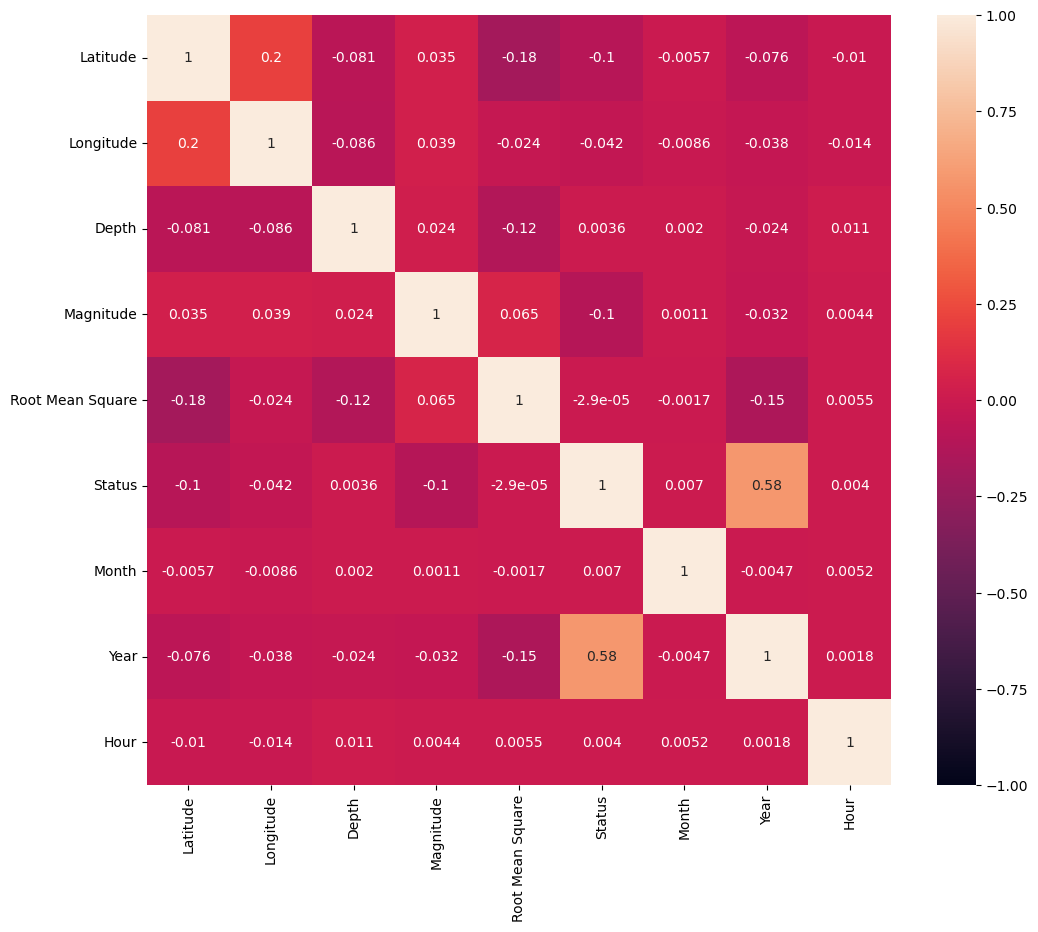

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [31]:
numeric_columns.remove('Status')

In [32]:
scaler = StandardScaler()
standardized_df = pd.DataFrame(scaler.fit_transform(df[numeric_columns]).copy(), columns=numeric_columns)
standardized_df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month,Year,Hour
0,0.583557,0.844245,0.496241,0.277523,0.000083,-1.603218,-1.915516,0.225119
1,0.006275,0.698723,0.075392,-0.195182,0.000083,-1.603218,-1.915516,-0.065111
2,-0.739015,-1.702132,-0.413969,0.750228,0.000083,-1.603218,-1.915516,0.950695
3,-2.017484,-0.503673,-0.454749,-0.195182,0.000083,-1.603218,-1.915516,0.950695
4,0.340862,0.691353,-0.454749,-0.195182,0.000083,-1.603218,-1.915516,0.225119
...,...,...,...,...,...,...,...,...
23401,1.219378,-1.263289,-0.476770,-0.667888,-5.131479,1.581079,1.619699,-0.500457
23402,1.218913,-1.263302,-0.505316,-0.904240,-4.953441,1.581079,1.619699,-0.355342
23403,1.170434,0.802894,-0.495529,0.041170,3.063160,1.581079,1.619699,0.080004
23404,-0.355421,0.629499,0.067236,0.986581,2.508719,1.581079,1.619699,1.531155


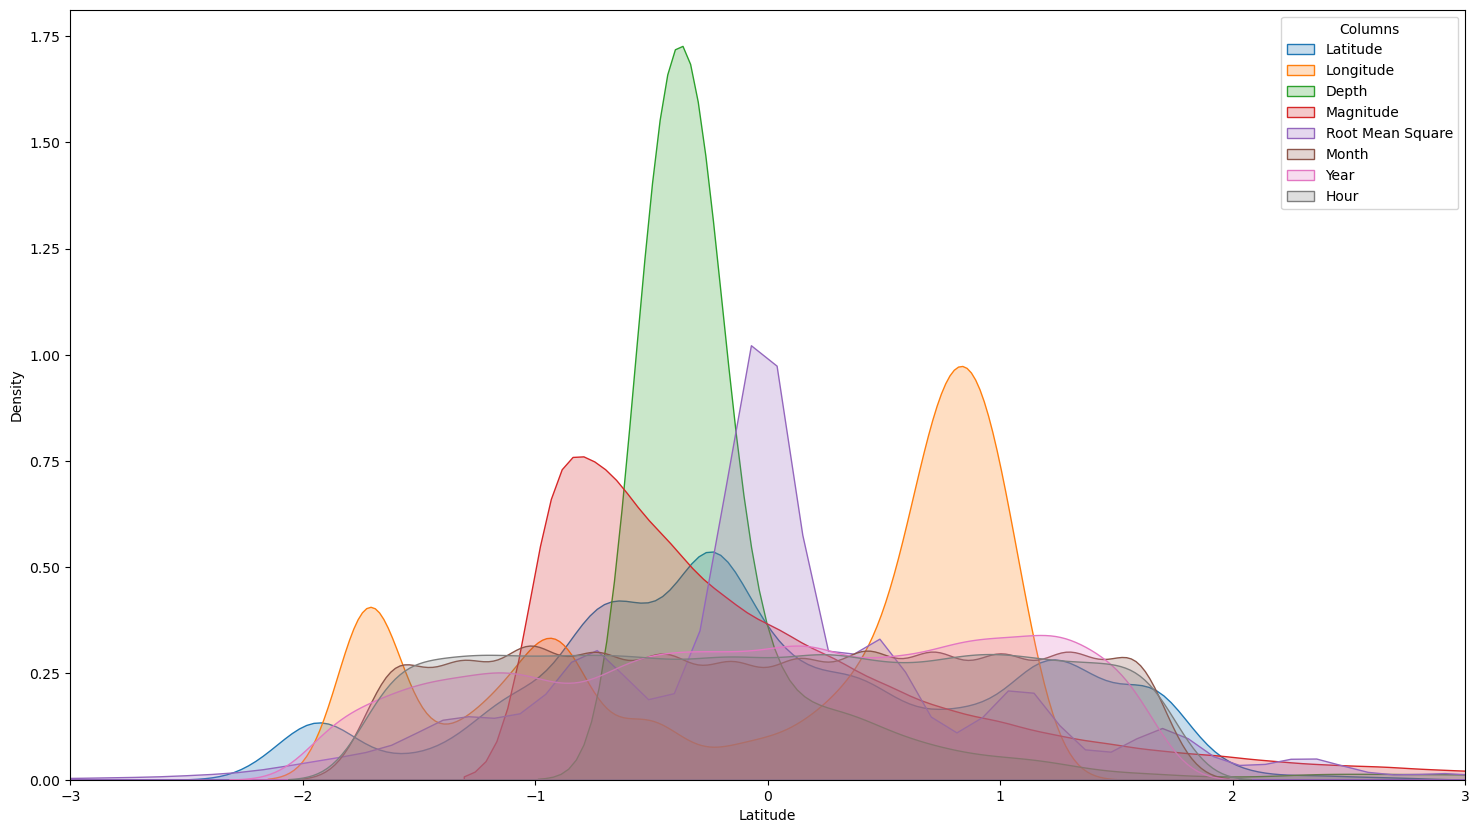

In [33]:
plt.figure(figsize=(18,10))
for column in numeric_columns:
    sns.kdeplot(standardized_df[column], fill=True, label=column)
plt.legend(title='Columns')
plt.xlim(-3,3)
plt.show()

#### Encoding

In [34]:
{column: df[column].unique() for column in df.select_dtypes('object').columns}

{'Type': array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
       dtype=object),
 'Magnitude Type': array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', 'MWB', 'MWW', 'MWR'],
       dtype=object),
 'ID': array(['ISCGEM860706', 'ISCGEM860737', 'ISCGEM860762', ..., 'US10007NAF',
        'US10007NL0', 'US10007NTD'], shape=(23406,), dtype=object),
 'Source': array(['ISCGEM', 'ISCGEMSUP', 'OFFICIAL', 'CI', 'US', 'NC', 'GCMT', 'UW',
        'NN', 'SE', 'AK', 'PR'], dtype=object),
 'Location Source': array(['ISCGEM', 'CI', 'US', 'H', 'U', 'G', 'NC', 'B', 'GCMT', 'AG', 'UW',
        'SPE', 'HVO', 'BRK', 'AGS', 'PGC', 'BOU', 'SLC', 'OTT', 'AEI',
        'AEIC', 'CASC', 'ISK', 'ATH', 'THE', 'ROM', 'MDD', 'WEL', 'GUC',
        'UNM', 'CSEM', 'RSPR', 'JMA', 'NN', 'CAR', 'SJA', 'TEH', 'BEO',
        'UCR', 'SE', 'TUL', 'TAP', 'THR', 'LIM', 'US_WEL', 'AK', 'PR'],
       dtype=object),
 'Magnitude Source': array(['ISCGEM', 'OFFICIAL', 'CI', 'US', '1020', 'BRK', 'NC', '1000',
        

In [35]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [36]:
df = df.drop('ID', axis=1)

In [37]:
df

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,Month,Year,Hour
0,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
1,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,11
2,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
3,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,18
4,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,1,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,1,12,2016,8
23402,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,1,12,2016,9
23403,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,1,12,2016,12
23404,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,1,12,2016,22


In [38]:
df = onehot_encode(df,
                   ['Type', 'Magnitude Type', 'Source', 'Location Source', 'Magnitude Source'],
                  ['T', 'MT', 'S', 'LS', 'MS'])

In [40]:
df

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,Month,Year,Hour,T_Earthquake,T_Explosion,T_Nuclear Explosion,T_Rock Burst,MT_MB,MT_MD,MT_MH,MT_ML,MT_MS,MT_MW,MT_MWB,MT_MWC,MT_MWR,MT_MWW,S_AK,S_CI,S_GCMT,S_ISCGEM,S_ISCGEMSUP,S_NC,S_NN,S_OFFICIAL,S_PR,S_SE,S_US,S_UW,LS_AEI,LS_AEIC,LS_AG,LS_AGS,LS_AK,LS_ATH,LS_B,LS_BEO,LS_BOU,LS_BRK,LS_CAR,LS_CASC,LS_CI,LS_CSEM,LS_G,LS_GCMT,LS_GUC,LS_H,LS_HVO,LS_ISCGEM,LS_ISK,LS_JMA,LS_LIM,LS_MDD,LS_NC,LS_NN,LS_OTT,LS_PGC,LS_PR,LS_ROM,LS_RSPR,LS_SE,LS_SJA,LS_SLC,LS_SPE,LS_TAP,LS_TEH,LS_THE,LS_THR,LS_TUL,LS_U,LS_UCR,LS_UNM,LS_US,LS_US_WEL,LS_UW,LS_WEL,MS_1000,MS_1009,MS_1020,MS_1023,MS_AK,MS_BRK,MS_CI,MS_GCMT,MS_GUC,MS_HRV,MS_ISCGEM,MS_NC,MS_NIED,MS_NN,MS_OFFICIAL,MS_PAR,MS_PGC,MS_PR,MS_SE,MS_US,MS_US_GCMT,MS_US_PGC,MS_UW
0,19.2460,145.6160,131.60,6.0,1.022784,0,1,1965,13,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.8630,127.3520,80.00,5.8,1.022784,0,1,1965,11,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-20.5790,-173.9720,20.00,6.2,1.022784,0,1,1965,18,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,-59.0760,-23.5570,15.00,5.8,1.022784,0,1,1965,18,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,11.9380,126.4270,15.00,5.8,1.022784,0,1,1965,13,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,38.3917,-118.8941,12.30,5.6,0.189800,1,12,2016,8,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23402,38.3777,-118.8957,8.80,5.5,0.218700,1,12,2016,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
23403,36.9179,140.4262,10.00,5.9,1.520000,1,12,2016,12,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
23404,-9.0283,118.6639,79.00,6.3,1.430000,1,12,2016,22,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Splitting and Scaling

In [41]:
y = df['Status'].copy()
X = df.drop('Status', axis=1).copy()

In [42]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=56)

In [44]:
X_train

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Month,Year,Hour,T_Earthquake,T_Explosion,T_Nuclear Explosion,T_Rock Burst,MT_MB,MT_MD,MT_MH,MT_ML,MT_MS,MT_MW,MT_MWB,MT_MWC,MT_MWR,MT_MWW,S_AK,S_CI,S_GCMT,S_ISCGEM,S_ISCGEMSUP,S_NC,S_NN,S_OFFICIAL,S_PR,S_SE,S_US,S_UW,LS_AEI,LS_AEIC,LS_AG,LS_AGS,LS_AK,LS_ATH,LS_B,LS_BEO,LS_BOU,LS_BRK,LS_CAR,LS_CASC,LS_CI,LS_CSEM,LS_G,LS_GCMT,LS_GUC,LS_H,LS_HVO,LS_ISCGEM,LS_ISK,LS_JMA,LS_LIM,LS_MDD,LS_NC,LS_NN,LS_OTT,LS_PGC,LS_PR,LS_ROM,LS_RSPR,LS_SE,LS_SJA,LS_SLC,LS_SPE,LS_TAP,LS_TEH,LS_THE,LS_THR,LS_TUL,LS_U,LS_UCR,LS_UNM,LS_US,LS_US_WEL,LS_UW,LS_WEL,MS_1000,MS_1009,MS_1020,MS_1023,MS_AK,MS_BRK,MS_CI,MS_GCMT,MS_GUC,MS_HRV,MS_ISCGEM,MS_NC,MS_NIED,MS_NN,MS_OFFICIAL,MS_PAR,MS_PGC,MS_PR,MS_SE,MS_US,MS_US_GCMT,MS_US_PGC,MS_UW
9364,0.024905,0.694436,-0.307941,-0.904240,-0.140277,-1.313736,-0.251885,-1.661378,0.088034,-0.013074,-0.086793,-0.006537,-0.437479,-0.016013,-0.014617,-0.057451,-0.280033,1.425297,-0.342547,-0.565279,-0.033348,-0.304243,-0.022648,-0.051117,-0.048532,-0.342702,-0.071787,-0.04673,-0.013074,-0.018491,-0.006537,-0.006537,0.367051,-0.016013,-0.017296,-0.041375,-0.006537,-0.02696,-0.024464,-0.024464,-0.009244,-0.006537,-0.006537,-0.006537,-0.006537,-0.013074,-0.051117,-0.006537,-0.009244,-0.048972,-0.044375,-0.017296,-0.022648,-0.352048,-0.025323,-0.011322,-0.006537,-0.009244,-0.048088,-0.013074,-0.006537,-0.028503,-0.006537,-0.017296,-0.011322,-0.006537,-0.006537,-0.006537,-0.020674,-0.006537,-0.017296,-0.011322,-0.011322,-0.009244,-0.006537,-0.006537,-0.029967,0.387739,-0.013074,-0.016013,-0.027742,-0.011322,-0.006537,-0.006537,-0.006537,-0.022648,-0.009244,-0.051117,-0.260556,-0.016013,1.358953,-0.351971,-0.152652,-0.013074,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
14594,-0.572867,1.021940,-0.307941,0.041170,0.290955,1.291598,0.441294,1.531155,0.088034,-0.013074,-0.086793,-0.006537,-0.437479,-0.016013,-0.014617,-0.057451,-0.280033,-0.701608,-0.342547,1.769039,-0.033348,-0.304243,-0.022648,-0.051117,-0.048532,-0.342702,-0.071787,-0.04673,-0.013074,-0.018491,-0.006537,-0.006537,0.367051,-0.016013,-0.017296,-0.041375,-0.006537,-0.02696,-0.024464,-0.024464,-0.009244,-0.006537,-0.006537,-0.006537,-0.006537,-0.013074,-0.051117,-0.006537,-0.009244,-0.048972,-0.044375,-0.017296,-0.022648,-0.352048,-0.025323,-0.011322,-0.006537,-0.009244,-0.048088,-0.013074,-0.006537,-0.028503,-0.006537,-0.017296,-0.011322,-0.006537,-0.006537,-0.006537,-0.020674,-0.006537,-0.017296,-0.011322,-0.011322,-0.009244,-0.006537,-0.006537,-0.029967,0.387739,-0.013074,-0.016013,-0.027742,-0.011322,-0.006537,-0.006537,-0.006537,-0.022648,-0.009244,-0.051117,-0.260556,-0.016013,1.358953,-0.351971,-0.152652,-0.013074,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,-0.898639,-0.011322,-0.006537,-0.016013
15136,-0.230576,0.904281,-0.307941,-0.904240,0.352559,1.291598,0.510612,-1.661378,0.088034,-0.013074,-0.086793,-0.006537,-0.437479,-0.016013,-0.014617,-0.057451,3.571002,-0.701608,-0.342547,-0.565279,-0.033348,-0.304243,-0.022648,-0.051117,-0.048532,-0.342702,-0.071787,-0.04673,-0.013074,-0.018491,-0.006537,-0.006537,0.367051,-0.016013,-0.017296,-0.041375,-0.006537,-0.02696,-0.024464,-0.024464,-0.009244,-0.006537,-0.006537,-0.006537,-0.006537,-0.013074,-0.051117,-0.006537,-0.009244,-0.048972,-0.044375,-0.017296,-0.022648,-0.352048,-0.025323,-0.011322,-0.006537,-0.009244,-0.048088,-0.013074,-0.006537,-0.028503,-0.006537,-0.017296,-0.011322,-0.006537,-0.006537,-0.006537,-0.020674,-0.006537,-0.017296,-0.011322,-0.011322,-0.009244,-0.006537,-0.006537,-0.029967,0.387739,-0.013074,-0.016013,-0.027742,-0.011322,-0.006537,-0.006537,-0.006537,-0.022648,-0.009244,-0.051117,-0.260556,-0.016013,-0.735861,-0.351971,-0.152652,-0.013074,-0.013074,-0.018491,-0.019613,-0.009244,-0.006537,-0.006537,1.112793,-0.011322,-0.006537,-0.016013
164,1.425819,0.871383,-0.245139,2.641050,0.000083,-0.155810,-1.915516,-1.226033,0.088034,-0.013074,-0.086793,-0.006537,-0.437479,

### Modeling and Training

In [45]:
X_train.shape

(16384, 104)

In [46]:
y_train.value_counts()

Status
1    14547
0     1837
Name: count, dtype: int64

In [47]:
inputs = tf.keras.Input(shape=(104,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = [tf.keras.metrics.AUC(name='auc')]
)

batch_size = 32
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - auc: 0.9983 - loss: 0.0440 - val_auc: 1.0000 - val_loss: 4.6687e-04 - learning_rate: 0.0010
Epoch 2/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - auc: 1.0000 - loss: 0.0015 - val_auc: 1.0000 - val_loss: 1.2627e-04 - learning_rate: 0.0010
Epoch 3/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9997 - loss: 8.4952e-04 - val_auc: 1.0000 - val_loss: 6.1315e-05 - learning_rate: 0.0010
Epoch 4/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - auc: 1.0000 - loss: 7.5697e-04 - val_auc: 1.0000 - val_loss: 3.0768e-05 - learning_rate: 0.0010
Epoch 5/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 0.9997 - loss: 8.7359e-04 - val_auc: 1.0000 - val_loss: 3.7778e-05 - learning_rate: 0.0010
Epoch 6/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 1.0000 - loss: 6.7241e-05 - val_auc: 1.0000 - val_loss: 2.8129e-05 - learning_rate: 0.0010
Epoch 7/30
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - auc: 1.0000 - loss: 3.4907e-05 - val_auc: 1.0000 - val

### Results

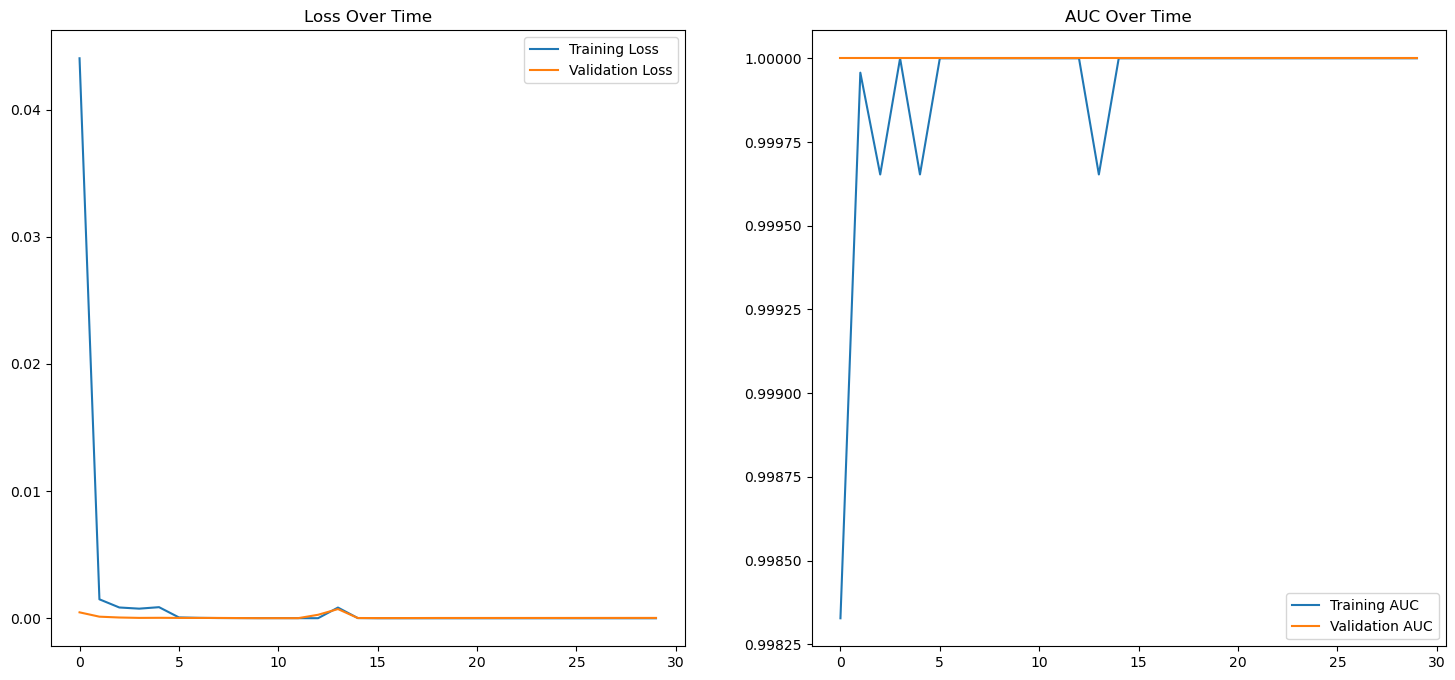

In [50]:
plt.figure(figsize=(18,8))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1 , 2, 2)
plt.plot(epochs_range, train_auc, label='Training AUC')
plt.plot(epochs_range, val_auc, label='Validation AUC')
plt.legend()
plt.title('AUC Over Time')

plt.show()

In [51]:
model.evaluate(X_test, y_test)

220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc: 1.0000 - loss: 2.7123e-06


[2.712293280637823e-06, 1.0]

In [52]:
y_test.value_counts()

Status
1    6223
0     799
Name: count, dtype: int64